In [2]:
# asn 1:
import pandas as pd
import seaborn as sns

In [3]:
import pandas as pd

file_path = '/home/jovyan/work/flight_price[1].xlsx'

try:
    # Try reading the Excel file with openpyxl engine
    df = pd.read_excel(file_path, engine='openpyxl')
    print("File read successfully with openpyxl engine.")
except UnicodeDecodeError:
    # If UnicodeDecodeError occurs, try reading with a different engine and encoding
    print("openpyxl engine failed. Trying a different engine and encoding.")
    try:
        df = pd.read_excel(file_path, engine='xlrd', encoding='latin-1')
        print("File read successfully with xlrd engine and Latin-1 encoding.")
    except Exception as e:
        print(f"Error: {e}")


File read successfully with openpyxl engine.


In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

**so the data set has "144" Rows and "3" columns**

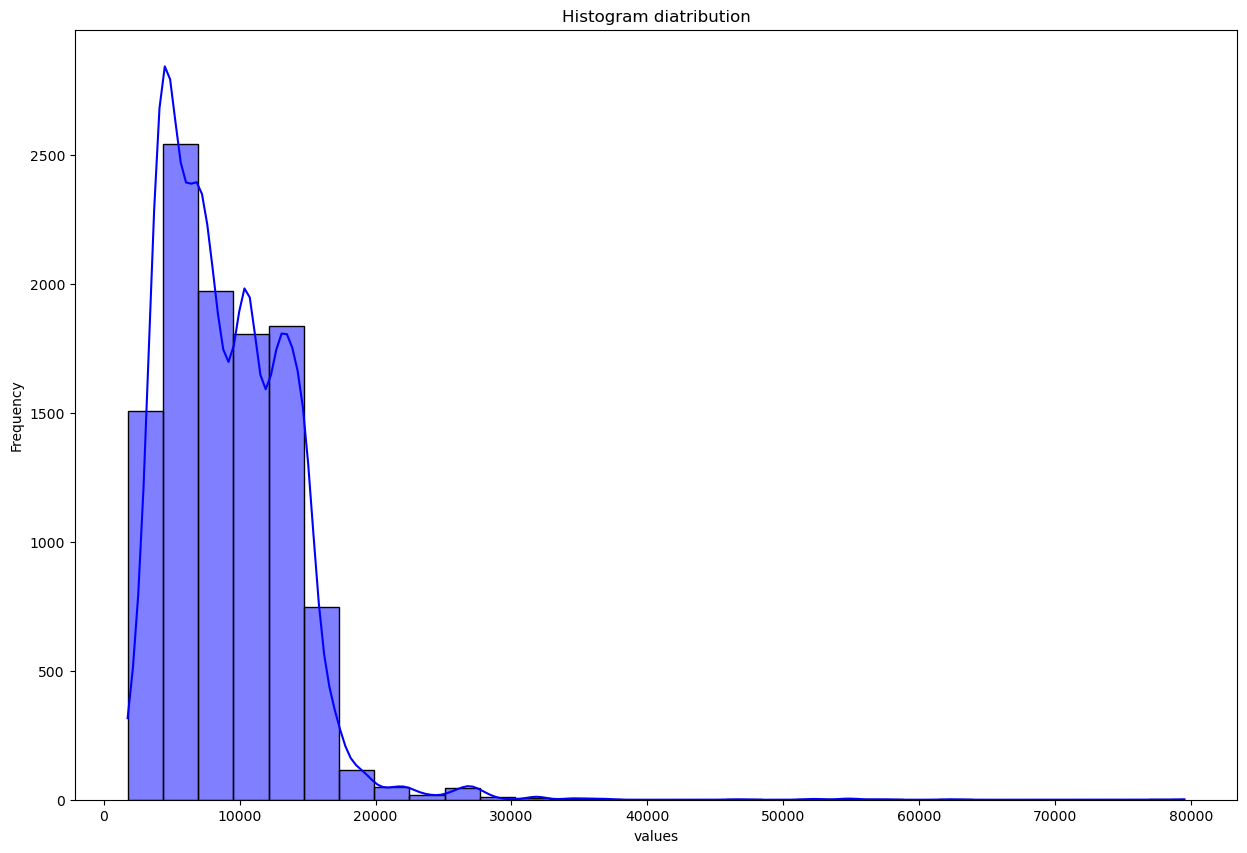

In [5]:
#ans 2:

import matplotlib.pyplot as plt 
plt.figure(figsize=(15,10))
sns.histplot(df["Price"], bins=30, kde=True, color="blue", edgecolor="black")
plt.xlabel('values')
plt.ylabel('Frequency')
plt.title('Histogram diatribution')
plt.show()



**its a right skwed distribution**

In [6]:
#ans3:

df.Price.describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

**The data represents a numerical variable "Price" with 10,683 observations. The values have a mean of 9087.06, a standard deviation of 4611.36, a minimum value of 1759, a 25th percentile value of 5277, a median (50th percentile) of 8372, a 75th percentile value of 12373, and a maximum value of 79512.**

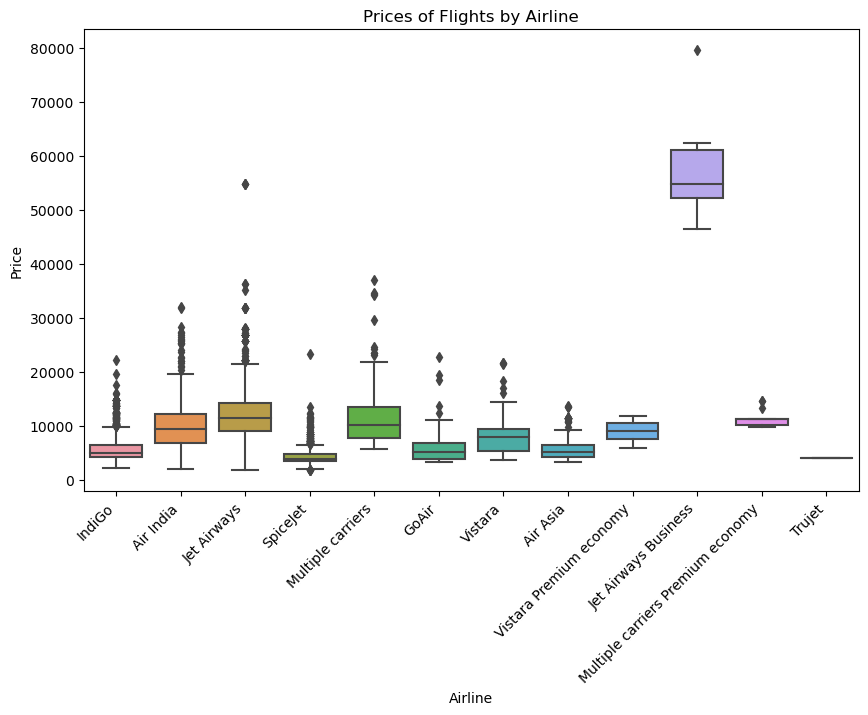

In [7]:
#ans4:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Prices of Flights by Airline')
plt.xticks(rotation=45, ha='right')
plt.show()

In [8]:
#ans5::

import pandas as pd

file_path = '/home/jovyan/work/flight_price[1].xlsx'

try:
    # Try reading the Excel file with openpyxl engine
    df = pd.read_excel(file_path, engine='openpyxl')
    print("File read successfully with openpyxl engine.")
except UnicodeDecodeError:
    # If UnicodeDecodeError occurs, try reading with a different engine and encoding
    print("openpyxl engine failed. Trying a different engine and encoding.")
    try:
        df = pd.read_excel(file_path, engine='xlrd', encoding='latin-1')
        print("File read successfully with xlrd engine and Latin-1 encoding.")
    except Exception as e:
        print(f"Error: {e}")
def identify_outliers(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

outliers = identify_outliers(df, "Price")
df1=pd.DataFrame(outliers)
df1.head(3)


File read successfully with openpyxl engine.


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890



**these are outliers**

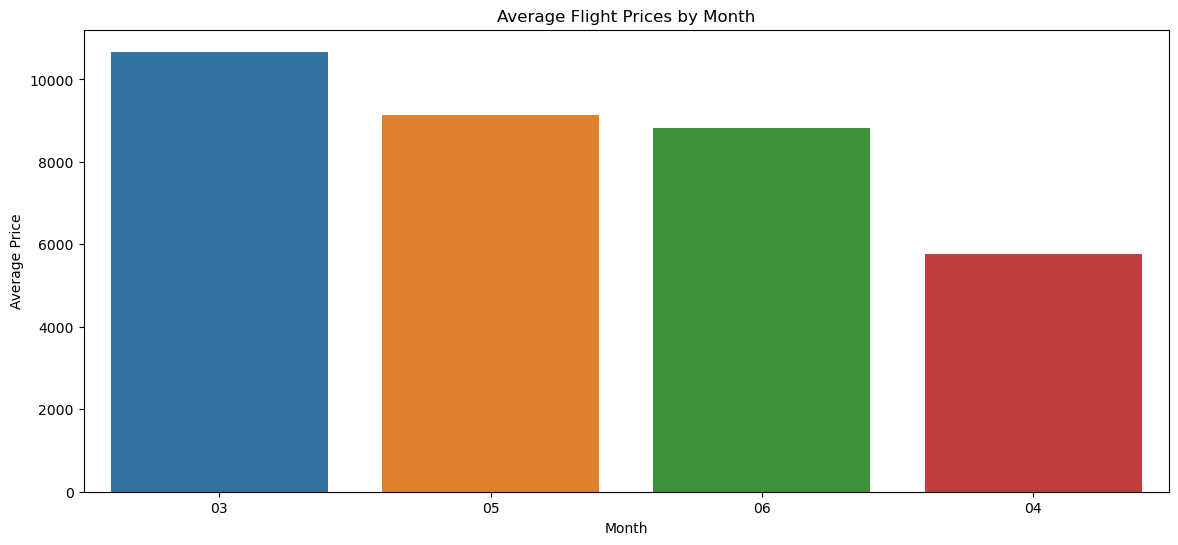

In [9]:
#ans6:
%matplotlib inline 
from warnings import filterwarnings
filterwarnings('ignore')
df["Day_of_Journey"]=df["Date_of_Journey"].str.split("/").str[0]
df["month_of_Journey"]=df["Date_of_Journey"].str.split("/").str[1]
df["year_of_Journey"]=df["Date_of_Journey"].str.split("/").str[2]

plt.figure(figsize=(14, 6))
sns.barplot(x='month_of_Journey', y='Price', data=df, ci=None)
plt.title('Average Flight Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()



**hence the 3rd month of the year which is march has the maximum profit and is cinsiderd to be the peak season of the year**

#ans7::
##Analyzing a Flight Price dataset involves examining various features to identify trends and patterns. Here are some key features you might consider analyzing, along with suggested visualizations:

1. **Date/Time Information:**
   - Analyze the flight prices over time to identify seasonal trends, such as peak travel seasons or low-demand periods.
   - Visualization: Time series line charts, with time on the x-axis and average prices on the y-axis.

2. **Day of the Week:**
   - Explore whether there are specific days of the week when flight prices are consistently higher or lower.
   - Visualization: Bar charts comparing average prices for each day of the week.

3. **Month/Season:**
   - Examine how flight prices vary across different months or seasons.
   - Visualization: Bar charts or line charts showing average prices per month or season.

4. **Route Analysis:**
   - Investigate how prices differ based on specific routes or destinations.
   - Visualization: Bar charts or heatmaps showing average prices for different routes.

5. **Flight Duration:**
   - Explore the relationship between flight duration and prices.
   - Visualization: Scatter plots with flight duration on the x-axis and prices on the y-axis.

6. **Airline Comparison:**
   - Compare the average prices offered by different airlines.
   - Visualization: Bar charts or box plots showing the distribution of prices for each airline.

7. **Advance Booking Period:**
   - Analyze whether booking well in advance or last-minute affects prices.
   - Visualization: Line charts or scatter plots showing how prices change with the number of days before departure.

8. **Class of Service:**
   - Examine how prices vary across different classes (economy, business, first class).
   - Visualization: Box plots or grouped bar charts showing price distributions for each class.

9. **Airport Analysis:**
   - Investigate if the airport of departure or arrival affects prices.
   - Visualization: Maps or bar charts showing average prices for different airports.

10. **Promotions and Discounts:**
    - Analyze the impact of promotions or discounts on flight prices.
    - Visualization: Time series charts showing the occurrence of promotions and how they relate to price changes.

Remember, the choice of visualizations may vary based on the specific dataset and the insights you want to highlight. Additionally, employing descriptive statistics and statistical tests can provide a more in-depth understanding of the identified trends. 

#ans8:

**Analyzing the Flight Price dataset to identify factors affecting flight prices involves exploring various features that could influence ticket costs. Here's a step-by-step approach**:

### 1. Data Exploration:
   - **Dataset Overview:**
     - Examine the dataset to understand its structure, size, and types of variables present.
     - Check for missing values, duplicates, and outliers.

### 2. Feature Selection:
   - **Dependent Variable:**
     - Identify the dependent variable, which in this case is the "Flight Price."

   - **Independent Variables (Features):**
     - Investigate potential factors influencing flight prices. These may include:
       1. **Route and Distance:**
          - Longer distances or more complex routes might lead to higher prices.
       2. **Departure and Arrival Times:**
          - Flights during peak hours or certain days might have different pricing.
       3. **Airline Carrier:**
          - Different airlines may have distinct pricing strategies.
       4. **Flight Duration:**
          - Longer flights might be more expensive.
       5. **Number of Stops:**
          - Non-stop flights could be more expensive than those with layovers.

### 3. Data Preprocessing:
   - **Handling Missing Values:**
     - Decide on strategies for handling missing values (imputation, removal, etc.).

   - **Categorical Variables:**
     - Convert categorical variables into a format suitable for analysis (e.g., one-hot encoding).

   - **Outliers:**
     - Examine and decide how to handle outliers that may skew the analysis.

### 4. Exploratory Data Analysis (EDA):
   - **Correlation Analysis:**
     - Explore the correlation between each independent variable and the flight price.

   - **Visualizations:**
     - Utilize visualizations (scatter plots, box plots, etc.) to identify patterns and trends.

### 5. Statistical Analysis:
   - **Statistical Tests:**
     - Conduct statistical tests to quantify the relationship between variables and flight prices.

### 6. Machine Learning Models:
   - **Model Building:**
     - Develop predictive models using regression techniques to understand feature importance.

   - **Feature Importance:**
     - Analyze feature importance scores from the models to identify key factors.

### 7. Presentation to Management:
   - **Executive Summary:**
     - Provide a concise summary of the analysis, emphasizing key findings.

   - **Visualizations:**
     - Include visualizations to illustrate trends and patterns in the data.

   - **Key Factors:**
     - Clearly outline the factors identified as significant contributors to flight prices.

   - **Recommendations:**
     - Offer recommendations for strategic pricing or operational adjustments based on the analysis.

   - **Limitations:**
     - Highlight any limitations in the analysis and areas where further investigation may be needed.

### 8. Communication:
   - **Non-Technical Language:**
     - Present findings in a non-technical language to ensure understanding by the management team.

   - **Q&A Session:**
     - Be prepared for a Q&A session to address any queries or concerns raised by the management team.

By following these steps, you can provide a comprehensive analysis of the factors influencing flight prices and offer valuable insights to the management team.

In [10]:
#ans9:
df2=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df2.info()

""" the data has RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


' the data has RangeIndex: 10841 entries, 0 to 10840\nData columns (total 13 columns):'

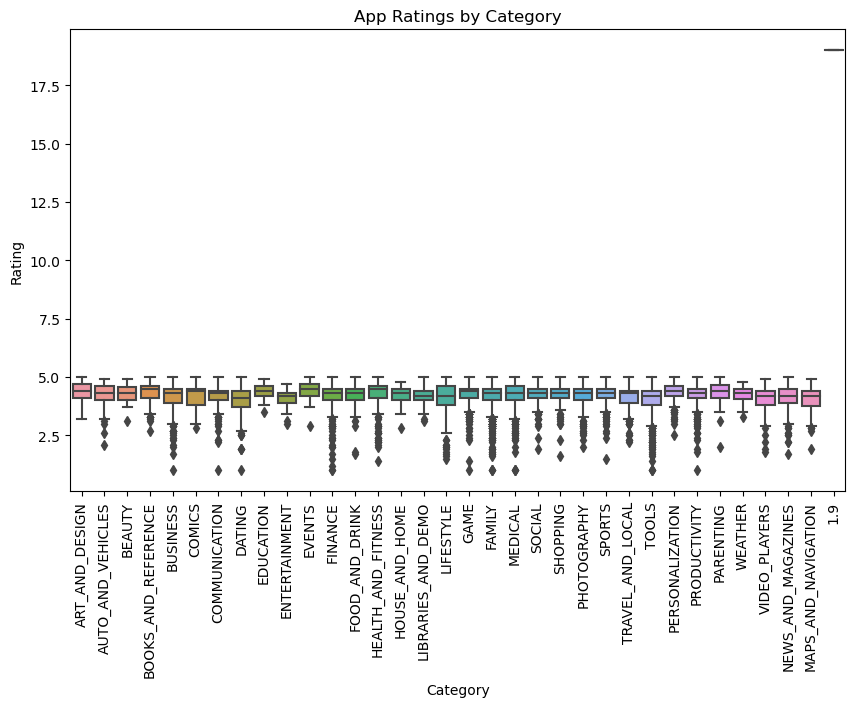

In [11]:
#ans10:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Rating', data=df2)
plt.xticks(rotation=90)  # Rotate category names for better visibility
plt.title('App Ratings by Category')
plt.show()



In [12]:
#ans11:

df2.isnull().sum()
print("yes there are missing values present")
print("missing values can mislead the analysis and can give incorrect information about data")


yes there are missing values present
missing values can mislead the analysis and can give incorrect information about data


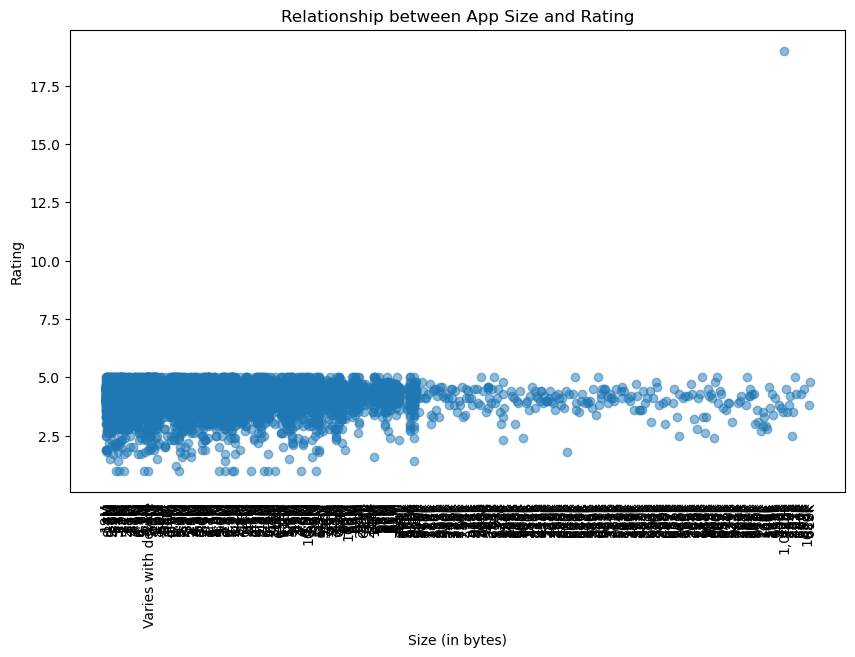

In [13]:
#ans12:

plt.figure(figsize=(10, 6))
plt.scatter(df2['Size'], df2['Rating'], alpha=0.5)
plt.title('Relationship between App Size and Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tick_params(axis='x', which='both', bottom=False, top=False)  # Hide x-axis ticks

plt.xlabel('Size (in bytes)')
plt.ylabel('Rating')
plt.show()


In [14]:
#asn13:



In [22]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df2[cols]=df2[cols].str.replace(item,'')

In [17]:
df2['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       'Everyone', '1.20', '1.04'], dtype=object)

In [33]:
df2.Type.mode()

0    2.0
Name: Type, dtype: float64

In [34]:
import numpy as np
df2["Type"]=df2["Type"].map({"free":1,"Paid":2,np.nan:1,"0":0})

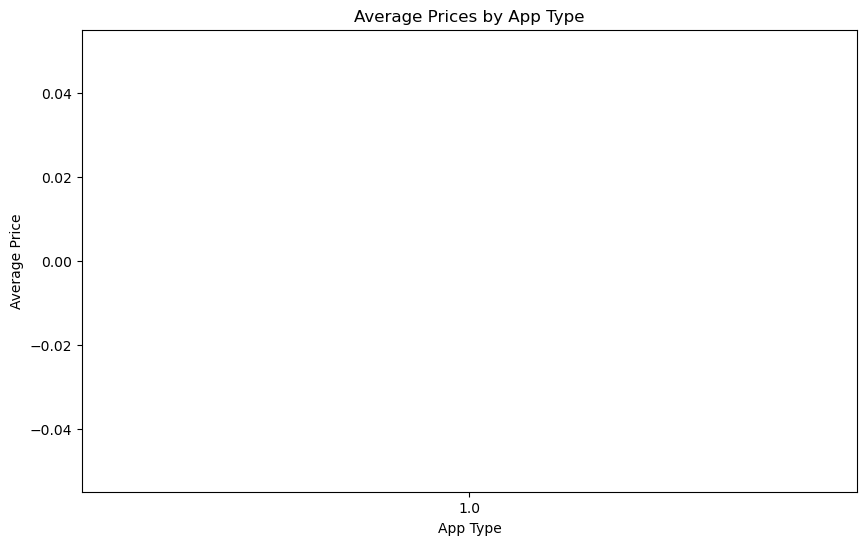

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df2 is your DataFrame

# Group by 'Type' and calculate the mean of 'Price' for each group
mean_price_type = df2.groupby('Type')['Price'].mean().reset_index()

# Plot the mean prices
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Price', data=mean_price_type, color='skyblue')

plt.title('Average Prices by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price')
plt.show()


In [54]:
df2.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

Top 10 Most Popular Apps:
App
Subway Surfers                  6.000000e+09
Google News                     4.000000e+09
Hangouts                        4.000000e+09
Google Drive                    4.000000e+09
Google Photos                   4.000000e+09
Instagram                       4.000000e+09
Candy Crush Saga                3.500000e+09
Maps - Navigate & Explore       3.000000e+09
Google Chrome: Fast & Secure    3.000000e+09
WhatsApp Messenger              3.000000e+09
Name: Installs, dtype: float64


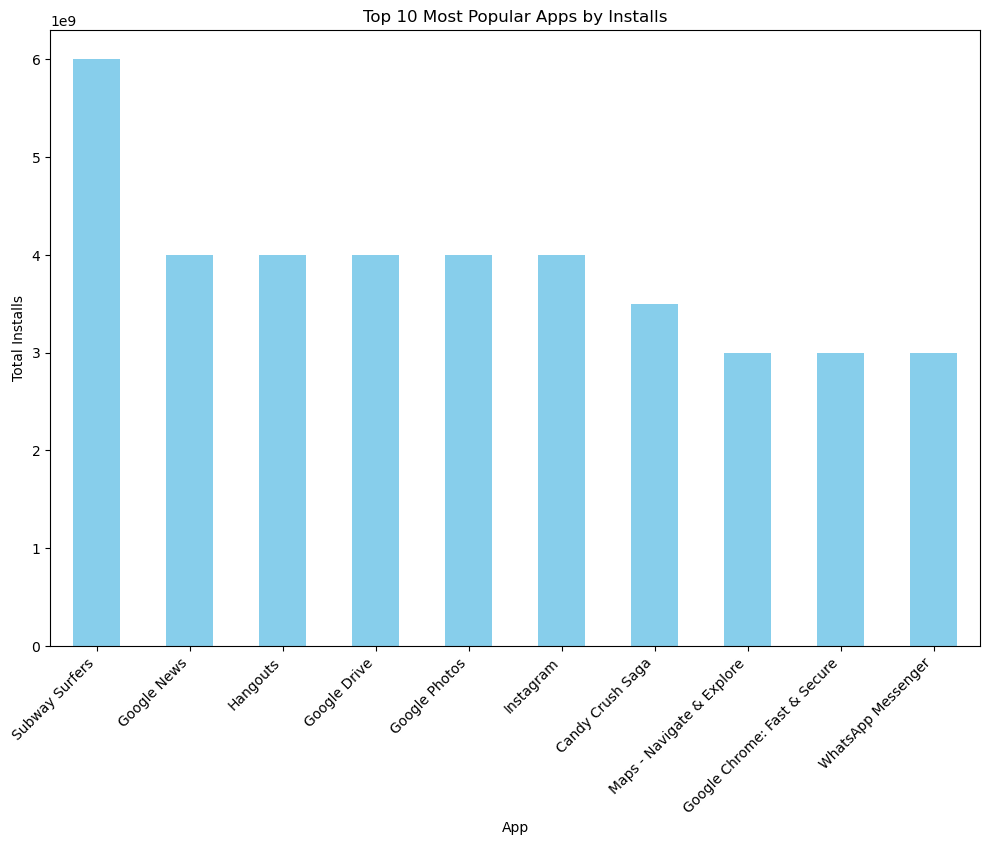

In [64]:
#ans14:
import pandas as pd



# Clean 'Installs' column by removing non-numeric characters
df2['Installs'] = df2['Installs'].replace('[\+,]', '', regex=True)

# Convert 'Installs' to numeric, handling non-numeric entries
df2['Installs'] = pd.to_numeric(df2['Installs'], errors='coerce')

# Filter out rows where 'Installs' is NaN (if needed)
df2 = df2.dropna(subset=['Installs'])

# Create a frequency table of the top 10 most popular apps
top_10_apps = df2.groupby('App')['Installs'].sum().sort_values(ascending=False).head(10)

# Display the frequency table
print("Top 10 Most Popular Apps:")
print(top_10_apps)


plt.figure(figsize=(12, 8))
top_10_apps.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Apps by Installs')
plt.xlabel('App')
plt.ylabel('Total Installs')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()


Unique App Categories: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']

Category Distribution:
 FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING    

Category
GAME                   3.508602e+10
COMMUNICATION          3.264728e+10
PRODUCTIVITY           1.417609e+10
SOCIAL                 1.406987e+10
TOOLS                  1.145277e+10
FAMILY                 1.025826e+10
PHOTOGRAPHY            1.008825e+10
NEWS_AND_MAGAZINES     7.496318e+09
TRAVEL_AND_LOCAL       6.868887e+09
VIDEO_PLAYERS          6.222003e+09
SHOPPING               3.247849e+09
ENTERTAINMENT          2.869160e+09
PERSONALIZATION        2.325495e+09
BOOKS_AND_REFERENCE    1.921470e+09
SPORTS                 1.751174e+09
HEALTH_AND_FITNESS     1.583073e+09
BUSINESS               1.001915e+09
FINANCE                8.766487e+08
EDUCATION              8.714520e+08
MAPS_AND_NAVIGATION    7.242819e+08
LIFESTYLE              5.376435e+08
WEATHER                4.261005e+08
FOOD_AND_DRINK         2.738988e+08
DATING                 2.643108e+08
HOUSE_AND_HOME         1.687125e+08
ART_AND_DESIGN         1.243381e+08
LIBRARIES_AND_DEMO     6.299591e+07
COMICS             

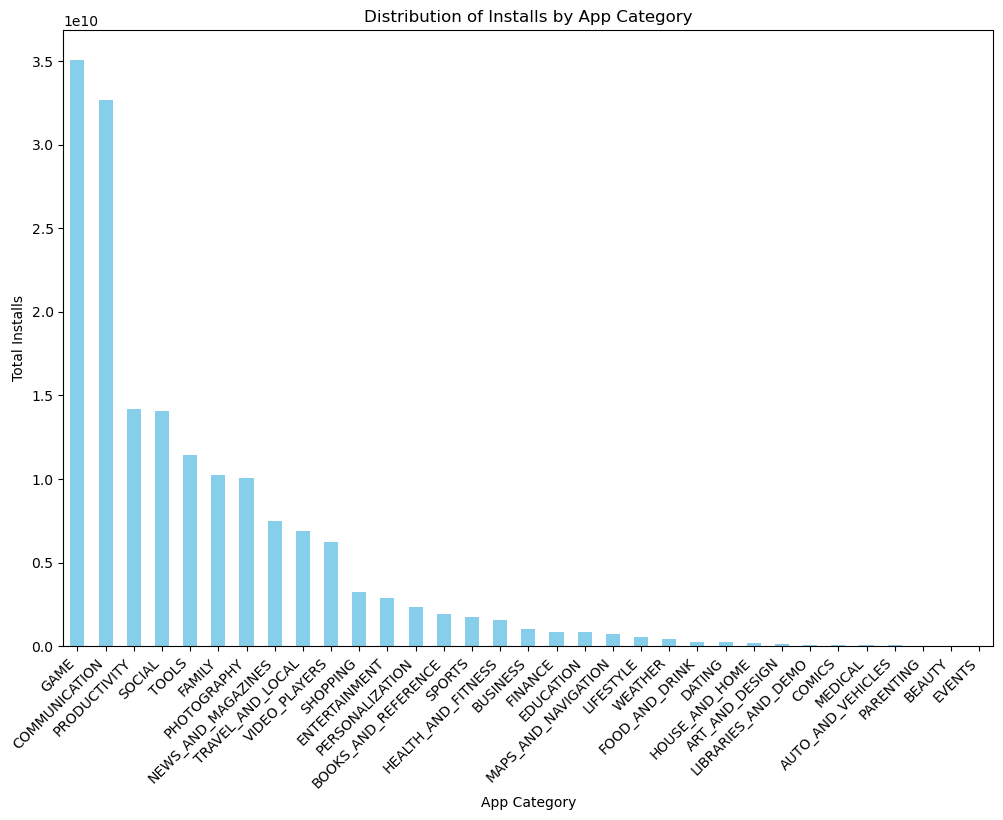

Average Ratings by Category:
 Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335987
PARENTING              4.300000
GAME                   4.286326
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.277104
SHOPPING               4.259664
SOCIAL                 4.255598
WEATHER                4.244000
SPORTS                 4.223511
PRODUCTIVITY           4.211396
HOUSE_AND_HOME         4.197368
FAMILY                 4.192272
PHOTOGRAPHY            4.192114
AUTO_AND_VEHICLES      4.190411
MEDICAL                4.189143
LIBRARIES_AND_DEMO     4.178462
FOOD_AND_DRINK         4.166972
COMMUNICATION          4.158537
COMICS                 4.155172
NEWS_AND_MAGAZINES     4.132189
FINANCE                4.131889
ENTERTAINMENT          4.126174
BUSINESS               4.121452
TRAVEL_AND_LOCAL       4.109292
LIFESTYLE              4.094904
VIDEO_PLAYERS          4.063750
M

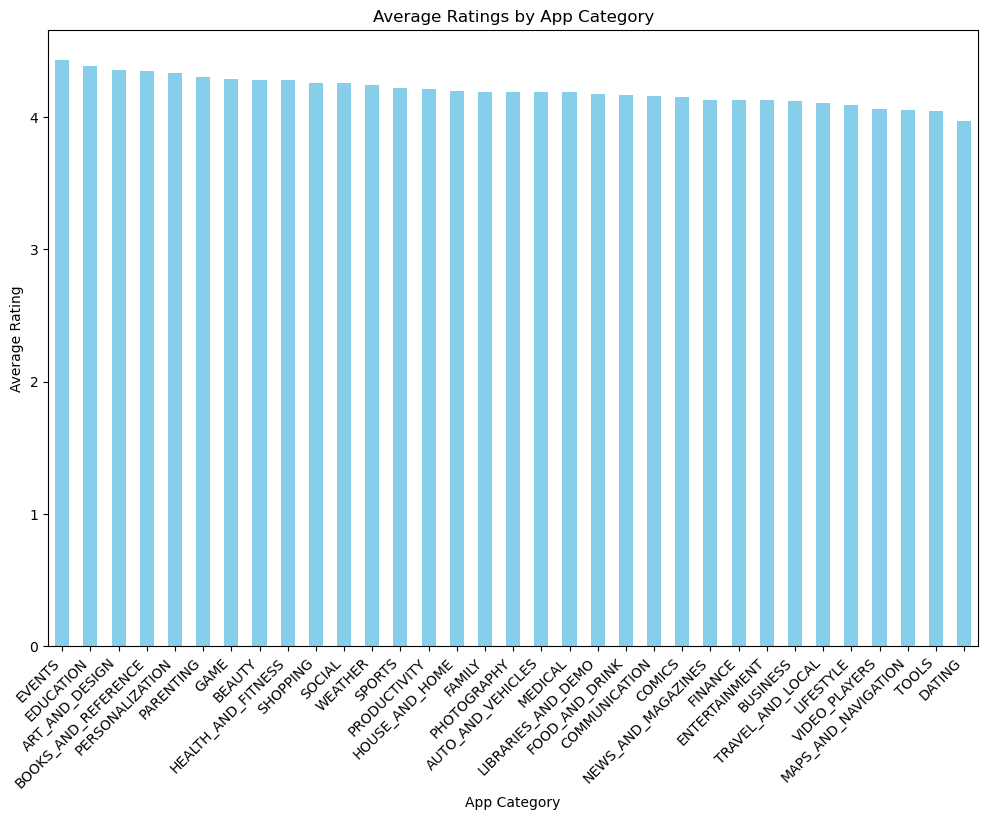

Average Reviews by Category:
 Category
HOUSE_AND_HOME                   inf
HEALTH_AND_FITNESS               inf
VIDEO_PLAYERS                    inf
TRAVEL_AND_LOCAL                 inf
TOOLS                            inf
SPORTS                           inf
SOCIAL                           inf
SHOPPING                         inf
PRODUCTIVITY                     inf
PHOTOGRAPHY                      inf
PERSONALIZATION                  inf
NEWS_AND_MAGAZINES               inf
MEDICAL                          inf
MAPS_AND_NAVIGATION              inf
LIFESTYLE                        inf
WEATHER                          inf
ENTERTAINMENT                    inf
DATING                           inf
GAME                             inf
FOOD_AND_DRINK                   inf
FINANCE                          inf
FAMILY                           inf
BOOKS_AND_REFERENCE              inf
BUSINESS                         inf
COMMUNICATION                    inf
EDUCATION                        inf

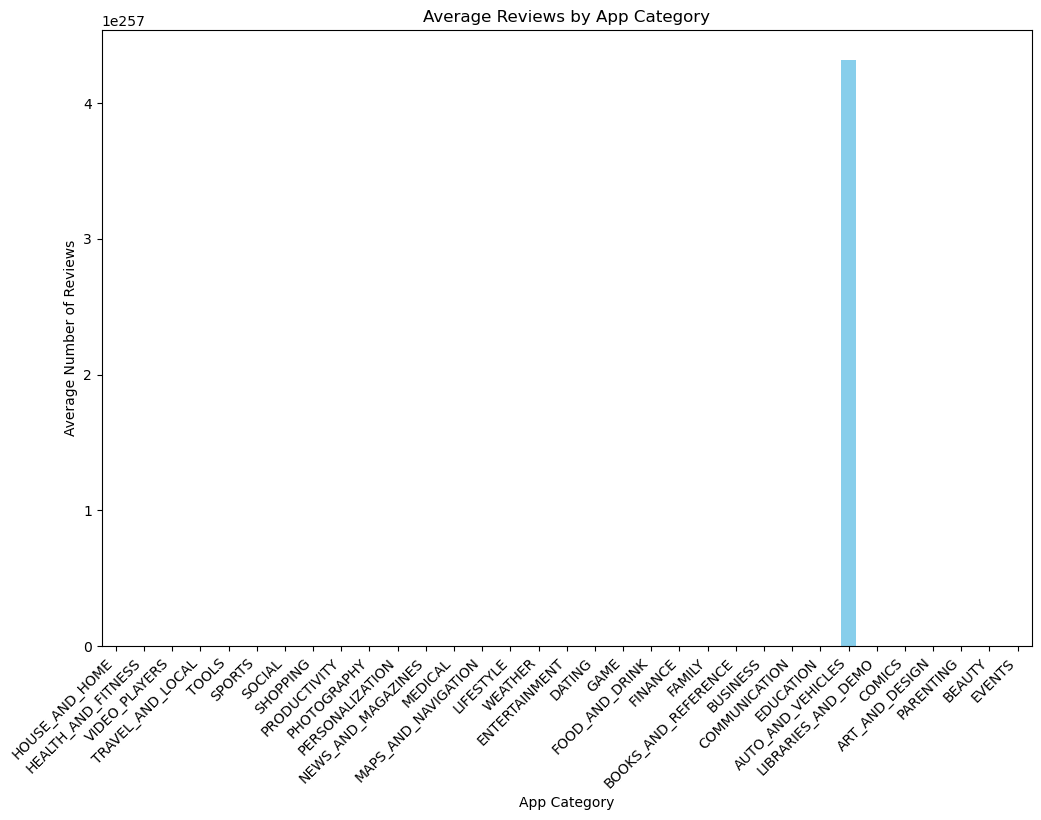

In [73]:
#ans15:
from IPython.display import HTML
# Assuming 'Category' is the column representing app categories
unique_categories = df2['Category'].unique()
category_distribution = df2['Category'].value_counts()

# Print unique categories and their distribution
print("Unique App Categories:", unique_categories)
print("\nCategory Distribution:\n", category_distribution)

# Assuming 'Installs' is the column representing the number of installs
install_by_category = df2.groupby('Category')['Installs'].sum().sort_values(ascending=False)

# Print the installs by category
display(HTML("<h1>Installs by Category:</h1>"))
print(install_by_category)



import matplotlib.pyplot as plt
display(HTML("<h1>Visualize Installations:</h1>"))
plt.figure(figsize=(12, 8))
install_by_category.plot(kind='bar', color='skyblue')
plt.title('Distribution of Installs by App Category')
plt.xlabel('App Category')
plt.ylabel('Total Installs')
plt.xticks(rotation=45, ha='right')
plt.show()


display(HTML("<h1>Analyze Ratings by Category:</h1>"))
# Assuming 'Rating' is the column representing user ratings
average_rating_by_category = df2.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# Print the average ratings by category
print("Average Ratings by Category:\n", average_rating_by_category)


display(HTML("<h1>Visualize Ratings::</h1>"))
plt.figure(figsize=(12, 8))
average_rating_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Ratings by App Category')
plt.xlabel('App Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()



display(HTML("<h1>Consider Reviews by Category::</h1>"))
# Assuming 'Reviews' is the column representing the number of reviews
average_reviews_by_category = df2.groupby('Category')['Reviews'].mean().sort_values(ascending=False)

# Print the average reviews by category
print("Average Reviews by Category:\n", average_reviews_by_category)



display(HTML("<h1>Visualize Reviews:</h1>"))
plt.figure(figsize=(12, 8))
average_reviews_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Reviews by App Category')
plt.xlabel('App Category')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()



In [ ]:
#ans16:

